## IRIS FLOWER CLASSIFICATION

In [25]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv(r'C:\Users\USER\Documents\iris Data science project\Iris.csv', encoding= 'unicode_escape')

In [4]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [7]:
del df["Id"]

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [9]:
species=df['Species'].unique()

In [10]:
listofcolumns=df.columns
print(listofcolumns)

Index(['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')


In [11]:
listofcolumns=df.columns
listofNumericalcolumns=[]

for i in listofcolumns:
    if df[i].dtype == 'float64':
        listofNumericalcolumns.append(i)
print('listofNumericalcolumns :',listofNumericalcolumns)
print('Species:',species)

listofNumericalcolumns : ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']
Species: ['Iris-setosa' 'Iris-versicolor' 'Iris-virginica']


In [12]:
for i in range(len(listofNumericalcolumns)):
    for j in range(len(species)):  
        print(listofNumericalcolumns[i]," : ",species[j])

SepalLengthCm  :  Iris-setosa
SepalLengthCm  :  Iris-versicolor
SepalLengthCm  :  Iris-virginica
SepalWidthCm  :  Iris-setosa
SepalWidthCm  :  Iris-versicolor
SepalWidthCm  :  Iris-virginica
PetalLengthCm  :  Iris-setosa
PetalLengthCm  :  Iris-versicolor
PetalLengthCm  :  Iris-virginica
PetalWidthCm  :  Iris-setosa
PetalWidthCm  :  Iris-versicolor
PetalWidthCm  :  Iris-virginica


In [13]:
df.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [14]:
df.groupby("Species").size()

Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
dtype: int64

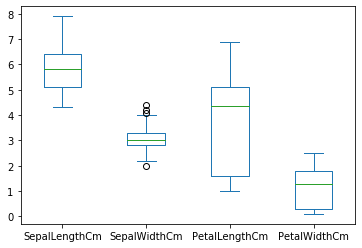

In [15]:
df.plot(kind='box')

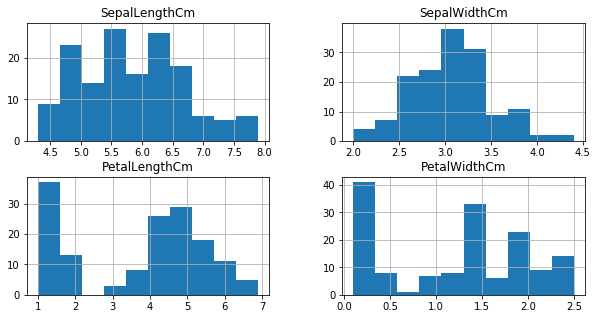

In [16]:
df.hist(figsize=(10,5))
plt.show()

HIST PLOT OF INDIVIDUAL Species
['Iris-setosa' 'Iris-versicolor' 'Iris-virginica']


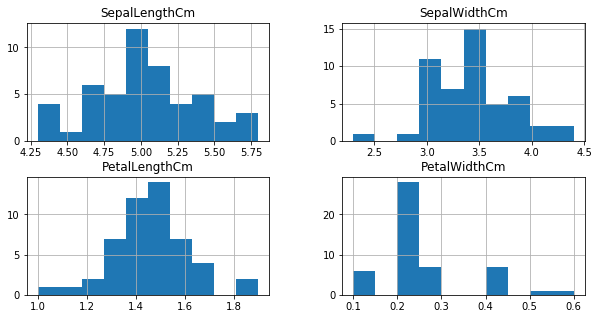

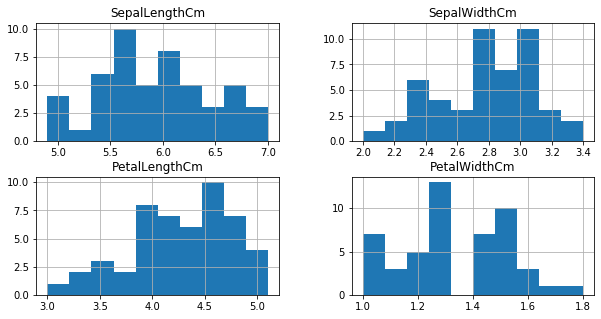

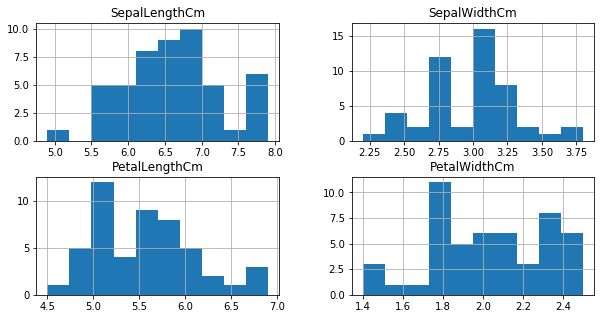

In [17]:
print("HIST PLOT OF INDIVIDUAL Species")
print(species)

for spice in species:
        df[df['Species']==spice].hist(figsize=(10,5))

In [24]:
import pandas as pd 
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier 
from sklearn.preprocessing import LabelEncoder 
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import accuracy_score 
from sklearn.metrics import classification_report 
  
#Importing the dataset 
d = df.iloc[:, :] 
  
#checking for null values 
print("Sum of NULL values in each column. ") 
print(d.isnull().sum()) 
  
#seperating the predicting column from the whole dataset 
X = d.iloc[:, :-1].values 
y = df.iloc[:, 4].values 
  
#Encoding the predicting variable 
labelencoder_y = LabelEncoder() 
y = labelencoder_y.fit_transform(y) 
  
#Spliting the data into test and train dataset 
X_train, X_test, y_train, y_test = train_test_split( 
              X, y, test_size = 0.3, random_state = 0) 
  
#Using the random forest classifier for the prediction 
classifier=RandomForestClassifier() 
classifier=classifier.fit(X_train,y_train) 
predicted=classifier.predict(X_test) 
  
#printing the results 
print ('Confusion Matrix :') 
print(confusion_matrix(y_test, predicted)) 
print ('Accuracy Score :',accuracy_score(y_test, predicted)) 
print ('Report : ') 
print (classification_report(y_test, predicted)) 

Sum of NULL values in each column. 
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64
Confusion Matrix :
[[16  0  0]
 [ 0 17  1]
 [ 0  1 10]]
Accuracy Score : 0.9555555555555556
Report : 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       0.94      0.94      0.94        18
           2       0.91      0.91      0.91        11

    accuracy                           0.96        45
   macro avg       0.95      0.95      0.95        45
weighted avg       0.96      0.96      0.96        45



C:\Users\USER\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\USER\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:489: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  y_store_unique_indices = np.zeros(y.shape, dtype=np.int)
C:\Users\USER\Anaconda3\lib\site-packages\sklearn\tree\tree.py:163: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To 